In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import re
import seaborn as sns 
%matplotlib inline
import seaborn as sns
from datetime import datetime
from eda_module import *

#Shorten video link 
def transform_short_link(long_link: str) -> str:
    patterns = {
        0: [r"(www\.youtube\.com)", "youtu.be"],
        1: [r"watch\?v=([a-zA-Zz0-9_-]{11})", r"\1"],
        2: [r"&t=(\d+)s", r"?t=\1s"],
    }
    
    new_link = long_link
    
    for i in range(3):
        new_link = re.sub(patterns[i][0], patterns[i][1], new_link)
        
    return new_link

def transform_malformed_datetime(dt: str) -> str:
    if type(dt) is not str:
        return dt
    
    pattern = r"^(.+)-(.+)-(.+)$"
    match = re.search(pattern, dt)
    if not match:
        return dt
    
    groups = match.groups()
    return "/".join([groups[1], groups[0], groups[2]])

df = pd.read_csv('youtube.csv', encoding='latin')
df['Video Link'] = df['Video Link'].apply(transform_short_link)
df['Date of Video Upload'] = df['Date of Video Upload'].apply(transform_malformed_datetime)
df['Date of the Last Comment'] = df['Date of the Last Comment'].apply(transform_malformed_datetime)
df.head(5)

,Video Link,Vid_View,Video Title,Channel URL,Creator Name,Creator Gender,Total_Channel_Subscriber,Total Chanel Views,Duration of Video,Duration in Seconds,...,Subtitle,Video Description,Hashtags,No of Comments,Date of the Last Comment,Maximum Quality of the Video,No of Videos the Channel,No of Playlist,Premiered or Not,Com_En_Per_Week
0,https://youtu.be/_0fUOJ55gis,"146,059",Samse - Didupe Off-road Royal Enfield Himalayan,https://www.youtube.com/c/sriharick,srihari ck,Male,40200,7964284,0:30:41,"1,841.00",...,No,Yes,0,419,8/6/2022,1080,462,12.0,No,1
1,https://youtu.be/_70MSLPRfZI,"231,969",Bhoom Baddhal Web Series,https://www.youtube.com/c/ChaibisketTelugu,Chai Bisket,Male,920000,137535681,0:14:24,864,...,No,Yes,1,189,6/15/2022,1080,251,12.0,Yes,2
2,https://youtu.be/_8gfCdt3H00?t=87s,878,"Customer Psychology, Four Views Of Consumer De...",https://www.youtube.com/channel/UCcIUnCsBfONvb...,Virda Warsi,Female,458,72945,0:08:12,492,...,No,Yes,0,0,NaN,720,158,0.0,No,0
3,https://youtu.be/_CkFNJgKsFs,"9,965",Top countries with proven natural gas reserves,https://www.youtube.com/c/trtworld,TRT,NaN,1680000,541653219,0:01:06,66,...,No,Yes,0,77,9/22/2022,1080,46509,48.0,No,20
4,https://youtu.be/_GFkHA5EZdE,"39,780,561",73 Questions With Selena Gomez,Vogue - YouTube,Vogue,NaN,12100000,3600496171,0:07:40,460,...,yes,Yes,0,28221,9/23/2022,1080,2872,113.0,No,1


In [2]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

# Data Wrangling 

Our dataset is accidentally detected with some of missing value and some outlier. And also its value inside are not clean making us not easier to understand so due to of these reasons, we have to use some of method plus some of built-in function of python to process dealing with this. 

Objective to Change : 

1. Shorten Video Link 
2. Rename some of incorrected column name 
3. Convert dtype for each column value 
4. Markout value to replace outlier 
5. Replace nan value by another name in creator_gender

In [3]:
df["video_link"]

0            https://youtu.be/_0fUOJ55gis
1            https://youtu.be/_70MSLPRfZI
2      https://youtu.be/_8gfCdt3H00?t=87s
3            https://youtu.be/_CkFNJgKsFs
4            https://youtu.be/_GFkHA5EZdE
                      ...                
900          https://youtu.be/GS18WawA-t0
901          https://youtu.be/_tc_APkjH2Q
902          https://youtu.be/Xfj4osSYfhU
903          https://youtu.be/mGEHqwVz0eI
904          https://youtu.be/UGATpt0I4vA
Name: video_link, Length: 905, dtype: object

In [4]:
#Detect null value 
df['video_link'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
900    False
901    False
902    False
903    False
904    False
Name: video_link, Length: 905, dtype: bool

In [5]:
df['creator_name'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
900    False
901    False
902    False
903    False
904    False
Name: creator_name, Length: 905, dtype: bool

In [6]:
#Find number of like by gender 
df.groupby('creator_name')['no_of_likes'].sum()

creator_name
100 Years Of Health      196000.0
2 Brother Vlogs            2400.0
365 Data Science          13000.0
5-Minutes Décor          680000.0
A Girl From Uk02              0.0
                          ...    
newslanudry                 670.0
srihari ck                 6700.0
touropia                  98000.0
your story tv               224.0
 Anubhav Singh Bassi    2400000.0
Name: no_of_likes, Length: 619, dtype: float64

In [7]:
#Removing null value to avoid error
#df.dropna(inplace = True)

In [8]:
df.isna().sum()

video_link                        0
vid_view                          0
video_title                       0
channel_url                       0
creator_name                     11
creator_gender                  314
total_channel_subscriber          0
total_chanel_views                0
duration_of_video                 0
duration_in_seconds               0
date_of_video_upload              0
no_of_likes                       1
language_of_the_video            21
subtitle                          1
video_description                 0
hashtags                          0
no_of_comments                    0
date_of_the_last_comment         24
maximum_quality_of_the_video      0
no_of_videos_the_channel          0
no_of_playlist                    9
premiered_or_not                  0
com_en_per_week                   0
dtype: int64

In [9]:
#Rename Column 
df.rename(columns = {"total_chanel_views" : "total_channel_views"}, inplace = True )

In [10]:
df.columns

Index(['video_link', 'vid_view', 'video_title', 'channel_url', 'creator_name',
       'creator_gender', 'total_channel_subscriber', 'total_channel_views',
       'duration_of_video', 'duration_in_seconds', 'date_of_video_upload',
       'no_of_likes', 'language_of_the_video', 'subtitle', 'video_description',
       'hashtags', 'no_of_comments', 'date_of_the_last_comment',
       'maximum_quality_of_the_video', 'no_of_videos_the_channel',
       'no_of_playlist', 'premiered_or_not', 'com_en_per_week'],
      dtype='object')

<AxesSubplot:>

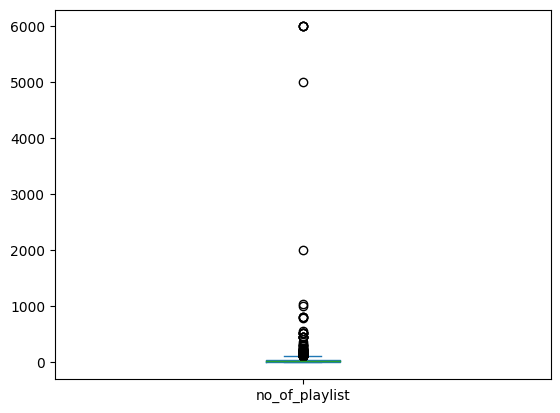

In [11]:
#Plot graph to detect outlier 
df['no_of_playlist'].plot(kind = 'box')

<AxesSubplot:>

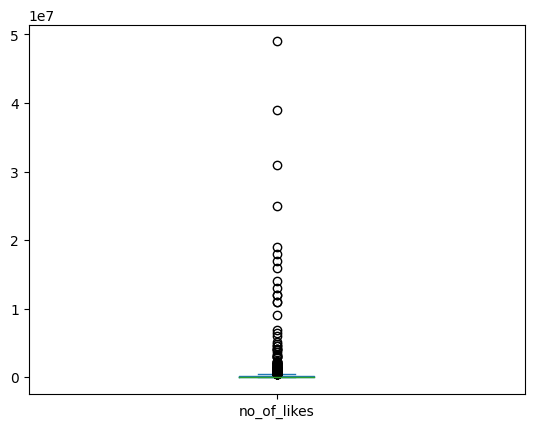

In [12]:
df['no_of_likes'].plot(kind = 'box')

In [13]:
#There are a bunch of outliers 

In [14]:
#Replacing with Median values as there are so many outliers
df['no_of_likes'].fillna(int(df['no_of_likes'].median()),inplace = True)
df['no_of_playlist'].fillna(int(df['no_of_playlist'].median()),inplace = True)

<AxesSubplot:>

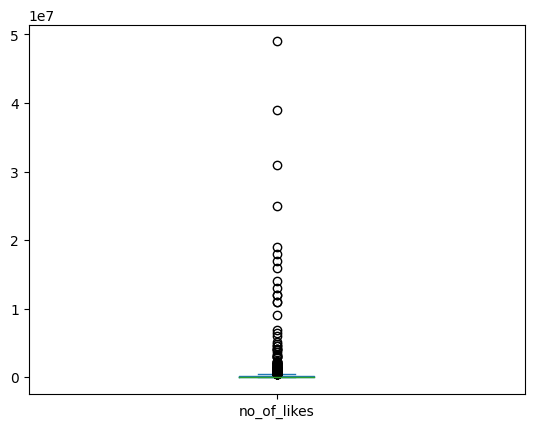

In [15]:
df['no_of_likes'].plot(kind = 'box')
#df['No of Playlist'].plot(kind = 'box')

<AxesSubplot:>

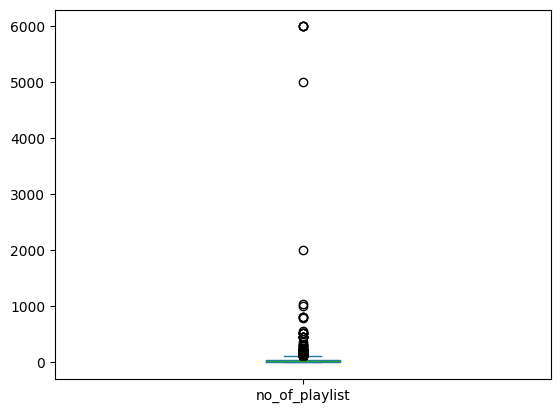

In [16]:
df['no_of_playlist'].plot(kind = 'box')

In [17]:
#the gender coloum is very likely having many missing values 
print(df['creator_gender'].value_counts())

Male       494
Female      78
Company     19
Name: creator_gender, dtype: int64


<AxesSubplot:ylabel='creator_gender'>

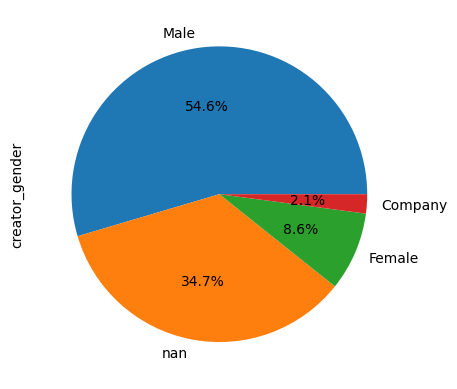

In [18]:
df['creator_gender'].value_counts(dropna = False).plot(kind = 'pie',autopct='%1.1f%%')

In [19]:
#The pie graph indicate that missing value (nan) are 34.7% which would be hugely affected to the data accuracy 

In [20]:
#Selected only main name of the company valuse name
df[df['creator_gender'] == 'Company']['creator_name'].unique()[:25]

array(['Mr Beast', 'Data Is Wonderful', 'Battlegrounds Mobile',
       'Beyounick', 'Nat Geo Wild', '365 Data Science', 'Motiversity',
       'Athleanx', 'Spinninrecords', 'Be Inspired Channel',
       'Business Insider', 'The Prime Thanatos', 'Dude Perfect',
       'All Chill Nation', 'Cartooning Club How to Draw',
       'Drawing 4 Kids How to Draw', 'Clash Of Clans',
       'Applied AI Course'], dtype=object)

In [21]:
df[df["creator_gender"].isnull()]['creator_name'].unique()[25:]

array(['Car Crash - Driving Fail', 'ABB Formula E', 'Clash of Clans',
       'AJ+', 'Business Insider', 'Edureka', 'DW Documentary', nan,
       'Daily Motivation', 'The Screen Patti', 'HUM Music',
       'UFC - Ultimate Fighting Championship', 'TEDx', 'Einzelgänger',
       'Pagani Automobili', 'Marvel', 'Ted-Ed', 'History',
       'The Viral Fever', 'Datascience Roadmap', 'Mad Lab', 'Sidenote',
       'Janson Media', 'Hindustan Times', 'The BLUNT', 'Tesery',
       'PlayStation', 'Ubisoft', 'Corridor', 'Dude perfect',
       'Volga Video', 'CNN', 'Porsche', 'Xpertgamingtech', 'BBC',
       'Bugatti', 'BBC News', 'Tedx Talks', 'English Speeches',
       'Warner Bros', 'DC', 'Law Of Attraction Coaching', 'The Quint',
       'Castrol', 'Hoog', 'Muaxh03', 'Life Noggin', 'All India Bakchod',
       'Watchgecko', 'Harvard University', 'Cartoon Network India',
       'MetroSaga', 'SonyLIV', 'Forged in Fire', 'Edureka!',
       'Freecodecamp.Org', 'MotoGP', 'SagaHits', 'newslanudry',
       

In [22]:
df.loc[df['creator_gender'].isnull(), 'creator_gender' ] = 'Company'

<AxesSubplot:ylabel='creator_gender'>

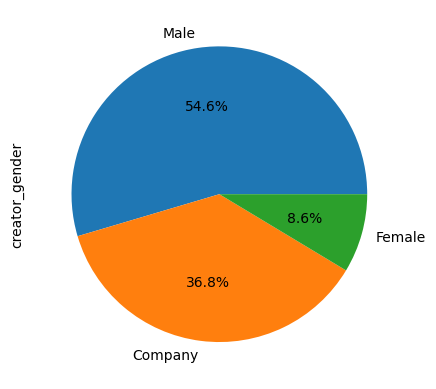

In [23]:
df['creator_gender'].value_counts(dropna= False).plot(kind = 'pie',autopct='%1.1f%%')

In [24]:
#Change Datatyoe of column 
df['total_channel_subscriber'] = df['total_channel_subscriber'].astype('str').astype('int')
df['no_of_likes'] = df['no_of_likes'].astype('Int64') #Capital Int64 to not run into NaN values
df['no_of_playlist'] = df['no_of_playlist'].astype('Int64')    

# Converting to string type
df['vid_view'] = df['vid_view'].astype(str)

#remove whitespace

df['vid_view'] = df['vid_view'].str.replace(",","").str.strip()
df['vid_view'] = pd.to_numeric(df['vid_view'])

#Convert it to string dtype
df['duration_in_seconds'] = df['duration_in_seconds'].astype(str)

In [25]:
df['duration_in_seconds'] = df['duration_in_seconds'].str.replace(",","").str.strip()

In [26]:
df['duration_in_seconds'] = pd.to_numeric(df['duration_in_seconds']).astype(int)

In [27]:
df[['total_channel_views']].head()

,total_channel_views
0,7964284
1,137535681
2,72945
3,541653219
4,3600496171


In [28]:
df['total_channel_views'] = df['total_channel_views'].astype(str)
df['total_channel_views'] = df['total_channel_views'].str.replace(",","").str.strip()
df['total_channel_views'] = pd.to_numeric(df['total_channel_views']).astype("int64")

In [29]:
df['no_of_comments'] = df['no_of_comments'].astype(str)
df['no_of_comments'] = df['no_of_comments'].str.replace(',','').str.strip()
df['no_of_comments'] = pd.to_numeric(df['no_of_comments'])

In [30]:
df[['no_of_comments']].head(5)

,no_of_comments
0,419
1,189
2,0
3,77
4,28221


In [31]:
df['maximum_quality_of_the_video'] = df['maximum_quality_of_the_video'].astype(str)
df['maximum_quality_of_the_video'] = df['maximum_quality_of_the_video'].apply(lambda x : x + 'p')

In [32]:
df[['maximum_quality_of_the_video']]

,maximum_quality_of_the_video
0,1080p
1,1080p
2,720p
3,1080p
4,1080p
...,...
900,1080p
901,720p
902,720p
903,1080p


In [33]:
df.subtitle.value_counts(dropna = False)

Yes    460
No     380
yes     64
NaN      1
Name: subtitle, dtype: int64

In [34]:
df['subtitle'] = df['subtitle'].map({'Yes':'yes', 'No': 'no', 'yes': 'yes'})

In [35]:
df.subtitle.value_counts(dropna = False)

yes    524
no     380
NaN      1
Name: subtitle, dtype: int64

In [36]:
df.head(5)

,video_link,vid_view,video_title,channel_url,creator_name,creator_gender,total_channel_subscriber,total_channel_views,duration_of_video,duration_in_seconds,...,subtitle,video_description,hashtags,no_of_comments,date_of_the_last_comment,maximum_quality_of_the_video,no_of_videos_the_channel,no_of_playlist,premiered_or_not,com_en_per_week
0,https://youtu.be/_0fUOJ55gis,146059,Samse - Didupe Off-road Royal Enfield Himalayan,https://www.youtube.com/c/sriharick,srihari ck,Male,40200,7964284,0:30:41,1841,...,no,Yes,0,419,8/6/2022,1080p,462,12,No,1
1,https://youtu.be/_70MSLPRfZI,231969,Bhoom Baddhal Web Series,https://www.youtube.com/c/ChaibisketTelugu,Chai Bisket,Male,920000,137535681,0:14:24,864,...,no,Yes,1,189,6/15/2022,1080p,251,12,Yes,2
2,https://youtu.be/_8gfCdt3H00?t=87s,878,"Customer Psychology, Four Views Of Consumer De...",https://www.youtube.com/channel/UCcIUnCsBfONvb...,Virda Warsi,Female,458,72945,0:08:12,492,...,no,Yes,0,0,NaN,720p,158,0,No,0
3,https://youtu.be/_CkFNJgKsFs,9965,Top countries with proven natural gas reserves,https://www.youtube.com/c/trtworld,TRT,Company,1680000,541653219,0:01:06,66,...,no,Yes,0,77,9/22/2022,1080p,46509,48,No,20
4,https://youtu.be/_GFkHA5EZdE,39780561,73 Questions With Selena Gomez,Vogue - YouTube,Vogue,Company,12100000,3600496171,0:07:40,460,...,yes,Yes,0,28221,9/23/2022,1080p,2872,113,No,1


In [37]:
#df.loc(['video_title'].value(), 'video_title').lower()
df['video_title'] = df['video_title'].str.lower()

In [38]:
df[['video_title']].head(5)

,video_title
0,samse - didupe off-road royal enfield himalayan
1,bhoom baddhal web series
2,"customer psychology, four views of consumer de..."
3,top countries with proven natural gas reserves
4,73 questions with selena gomez


In [39]:
df['creator_gender'].isnull().value_counts()

False    905
Name: creator_gender, dtype: int64

<AxesSubplot:ylabel='creator_gender'>

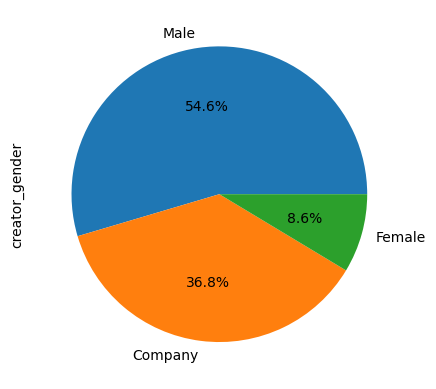

In [40]:
df['creator_gender'].value_counts(dropna = False).plot(kind = 'pie', autopct='%1.1f%%')

In [41]:
df['subtitle'].fillna(df['subtitle'].mode()[0], inplace = True) 
df['date_of_the_last_comment'].fillna(df['date_of_the_last_comment'].mode()[0], inplace = True) 

In [42]:
df['subtitle'].isnull().sum()

0

<AxesSubplot:>

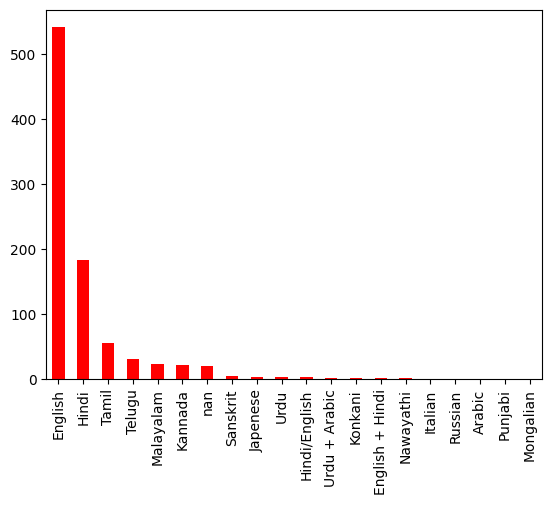

In [43]:
df['language_of_the_video'].value_counts(dropna = False).plot(kind = 'bar', color= 'red')

In [44]:
df['duration_of_video'] = pd.to_datetime(df['duration_of_video'])
df['duration_of_video'] = df['duration_of_video'].apply(lambda x:x.time())

In [45]:
df.dropna(subset = ['language_of_the_video', 'creator_name'], inplace = True)

In [46]:
df.isna().sum()

video_link                      0
vid_view                        0
video_title                     0
channel_url                     0
creator_name                    0
creator_gender                  0
total_channel_subscriber        0
total_channel_views             0
duration_of_video               0
duration_in_seconds             0
date_of_video_upload            0
no_of_likes                     0
language_of_the_video           0
subtitle                        0
video_description               0
hashtags                        0
no_of_comments                  0
date_of_the_last_comment        0
maximum_quality_of_the_video    0
no_of_videos_the_channel        0
no_of_playlist                  0
premiered_or_not                0
com_en_per_week                 0
dtype: int64

So now there are no null values in our dataset and lets look into the columns of date and time category and see what changes we can make.

In [47]:
df[['duration_of_video','date_of_video_upload','date_of_the_last_comment']].head()

,duration_of_video,date_of_video_upload,date_of_the_last_comment
0,00:30:41,7/29/2022,8/6/2022
1,00:14:24,5/22/2022,6/15/2022
2,00:08:12,2/9/2021,9/23/2022
3,00:01:06,9/13/2022,9/22/2022
4,00:07:40,3/21/2017,9/23/2022


Convert string Date time into Python Date time object to perform better operation 

In [80]:
df['date_of_video_upload'] = pd.to_datetime(df['date_of_video_upload'])
df['date_of_the_last_comment'] = pd.to_datetime(df['date_of_video_upload'])

In [49]:
df['date_of_video_upload'].info()

<class 'pandas.core.series.Series'>
Int64Index: 873 entries, 0 to 904
Series name: date_of_video_upload
Non-Null Count  Dtype         
--------------  -----         
873 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.6 KB


In [50]:
df['duration_of_video'].info

<bound method Series.info of 0      00:30:41
1      00:14:24
2      00:08:12
3      00:01:06
4      00:07:40
         ...   
900    00:13:47
901    00:06:44
902    00:06:24
903    00:04:39
904    00:01:21
Name: duration_of_video, Length: 873, dtype: object>

In [51]:
#df.reset_index(inplace = True)

In [52]:
#df.drop(columns = ['index'], inplace = True)

In [53]:
df['duration_of_video'].info

<bound method Series.info of 0      00:30:41
1      00:14:24
2      00:08:12
3      00:01:06
4      00:07:40
         ...   
900    00:13:47
901    00:06:44
902    00:06:24
903    00:04:39
904    00:01:21
Name: duration_of_video, Length: 873, dtype: object>

In [54]:
df[['duration_of_video', 'duration_in_seconds','date_of_video_upload','date_of_the_last_comment']].dtypes

duration_of_video                   object
duration_in_seconds                  int32
date_of_video_upload        datetime64[ns]
date_of_the_last_comment    datetime64[ns]
dtype: object

In [55]:
df['duration_in_minutes'] = df.duration_of_video.apply(lambda x:(round(x.hour * 60 + x.minute + x.second/60)))

In [56]:
df[['duration_in_minutes']].head(5)

,duration_in_minutes
0,31
1,14
2,8
3,1
4,8


In [57]:
df['upload_year'] = df['date_of_video_upload'].apply(lambda x:x.strftime('%Y'))
df['upload_month'] = df['date_of_video_upload'].apply(lambda x:x.strftime('%B'))
df['upload_weekday'] = df['date_of_video_upload'].apply(lambda x:x.strftime('%A'))

In [58]:
df.duration_of_video

0      00:30:41
1      00:14:24
2      00:08:12
3      00:01:06
4      00:07:40
         ...   
900    00:13:47
901    00:06:44
902    00:06:24
903    00:04:39
904    00:01:21
Name: duration_of_video, Length: 873, dtype: object

Add three column year, month and weekday of uploading video

In [59]:
df.head(2)

,video_link,vid_view,video_title,channel_url,creator_name,creator_gender,total_channel_subscriber,total_channel_views,duration_of_video,duration_in_seconds,...,date_of_the_last_comment,maximum_quality_of_the_video,no_of_videos_the_channel,no_of_playlist,premiered_or_not,com_en_per_week,duration_in_minutes,upload_year,upload_month,upload_weekday
0,https://youtu.be/_0fUOJ55gis,146059,samse - didupe off-road royal enfield himalayan,https://www.youtube.com/c/sriharick,srihari ck,Male,40200,7964284,00:30:41,1841,...,2022-07-29,1080p,462,12,No,1,31,2022,July,Friday
1,https://youtu.be/_70MSLPRfZI,231969,bhoom baddhal web series,https://www.youtube.com/c/ChaibisketTelugu,Chai Bisket,Male,920000,137535681,00:14:24,864,...,2022-05-22,1080p,251,12,Yes,2,14,2022,May,Sunday


In [60]:
df.head().iloc[:,-4:]

,duration_in_minutes,upload_year,upload_month,upload_weekday
0,31,2022,July,Friday
1,14,2022,May,Sunday
2,8,2021,February,Tuesday
3,1,2022,September,Tuesday
4,8,2017,March,Tuesday


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x800 with 0 Axes>

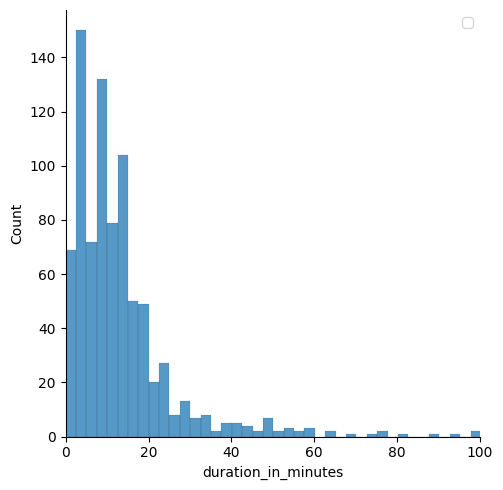

In [61]:
plt.figure(figsize = (20,8))
sns.displot(x = 'duration_in_minutes', data = df)
plt.xlim(0,100)
plt.legend()

In [62]:
df['length_catagories'] = pd.cut(df['duration_in_minutes'], bins = [-1,2,10,30,60,1100] , labels = ['Supershort', 'Short', 'Medium','Long','SuperLong'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 904
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   video_link                    873 non-null    object        
 1   vid_view                      873 non-null    int64         
 2   video_title                   873 non-null    object        
 3   channel_url                   873 non-null    object        
 4   creator_name                  873 non-null    object        
 5   creator_gender                873 non-null    object        
 6   total_channel_subscriber      873 non-null    int32         
 7   total_channel_views           873 non-null    int64         
 8   duration_of_video             873 non-null    object        
 9   duration_in_seconds           873 non-null    int32         
 10  date_of_video_upload          873 non-null    datetime64[ns]
 11  no_of_likes                   87

In [64]:
df1 = df.filter(items = ['creator_name', 'total_channel_views'])
df1.groupby('creator_name').max().head(5)

,total_channel_views
creator_name,
100 Years Of Health,21328785
2 Brother Vlogs,18751275
365 Data Science,10864605
5-Minutes Décor,2504718854
A Girl From Uk02,13970


In [65]:
df1= df[df['creator_name'] == 'T-Series']
df1[['creator_name', 'total_channel_views']]

,creator_name,total_channel_views
845,T-Series,202000000000


In [66]:
df.total_channel_views.apply(lambda x : str(round(x / 10**6, 6)) + 'M')

0         7.964284M
1       137.535681M
2         0.072945M
3       541.653219M
4      3600.496171M
           ...     
900      129.92669M
901      129.92669M
902       5.104872M
903       5.104872M
904     728.858923M
Name: total_channel_views, Length: 873, dtype: object

In [67]:
df.length_catagories

0            Long
1          Medium
2           Short
3      Supershort
4           Short
          ...    
900        Medium
901         Short
902         Short
903         Short
904    Supershort
Name: length_catagories, Length: 873, dtype: category
Categories (5, object): ['Supershort' < 'Short' < 'Medium' < 'Long' < 'SuperLong']

In [68]:
df.to_csv('youtube_cleaned.csv', index = False)

# EDA

In [69]:
#df.groupby('creator_name')[['total_channel_subscriber']].apply(lambda x : (x > 2*10**8)).sum().\
#reset_index( name = 'count')
df[df['total_channel_subscriber'] > 2 * 10 ** 8][['creator_name', 'total_channel_subscriber']]

,creator_name,total_channel_subscriber
444,Edureka,305200000
551,Bhushan Kumar,225000000
845,T-Series,225000000


## Top 10 Channels Subscribers wise 

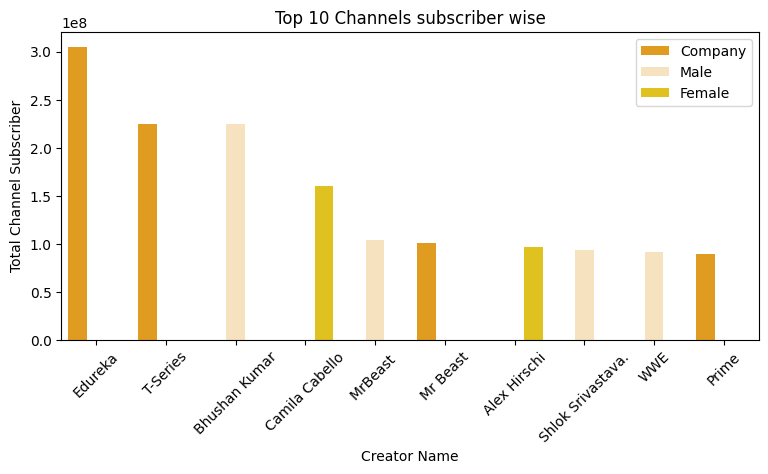

In [70]:
highest_subscribe(df)

In [71]:
df[['creator_name', 'creator_gender','total_channel_subscriber']].groupby('creator_name').max().\
                        sort_values(by = 'total_channel_subscriber',ascending = False).head(10)

,creator_gender,total_channel_subscriber
creator_name,,
Edureka,Company,305200000
T-Series,Company,225000000
Bhushan Kumar,Male,225000000
Camila Cabello,Female,160000000
MrBeast,Male,104000000
Mr Beast,Company,101000000
Alex Hirschi,Female,97000000
Shlok Srivastava.,Male,93900000
WWE,Male,91000000


As per the dataset, we can see that more than half of the top 10 channels are by individuals not comapanies. Males and Companies have equal number of channels in the top and double that of female.

## Top 10 Channels View wise 

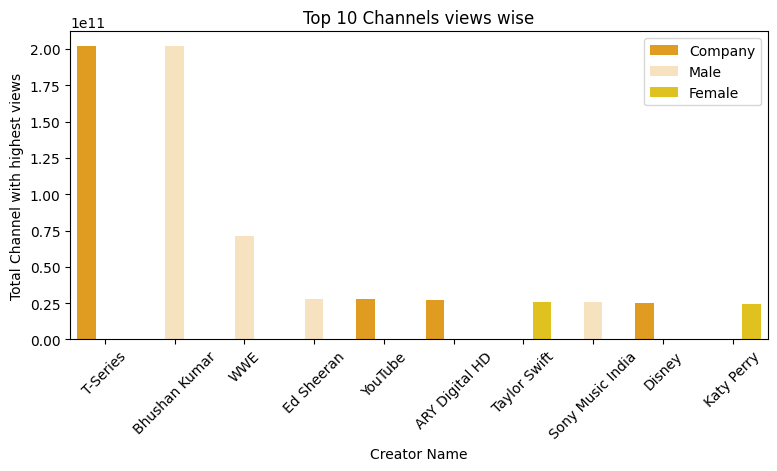

In [72]:
highest_views(df)

In [73]:
df[['creator_name', 'creator_gender','total_channel_views']].groupby('creator_name').max().\
                        sort_values(by = 'total_channel_views',ascending = False).head(10)

,creator_gender,total_channel_views
creator_name,,
T-Series,Company,202000000000
Bhushan Kumar,Male,202000000000
WWE,Male,71528224019
Ed Sheeran,Male,28173317993
YouTube,Company,27725160330
ARY Digital HD,Company,27479278750
Taylor Swift,Female,25906311446
Sony Music India,Male,25516868039
Disney,Company,25216557237


We observe that most of the channels belong to music industry. It seems music 
channels get the highest number of views of all categories.

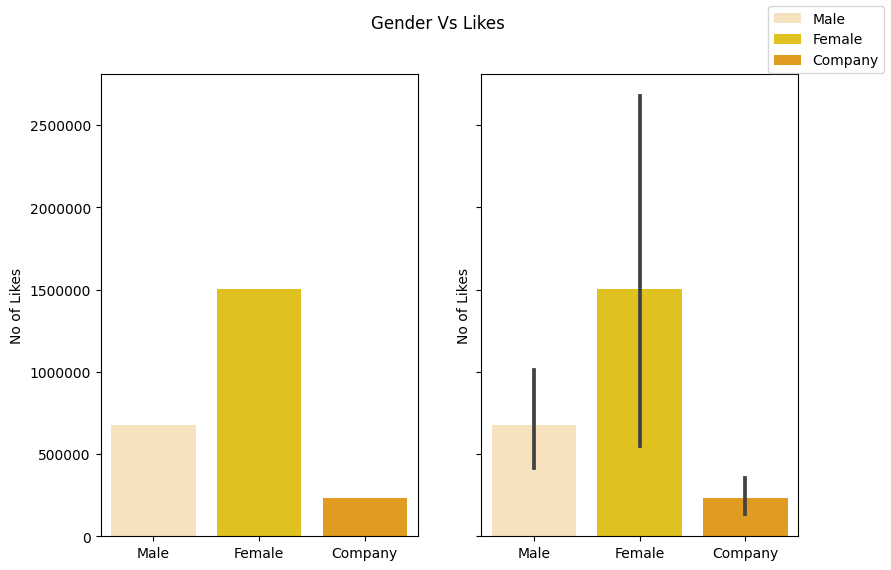

In [74]:
numberOfLike_byGen(df)

The videos made by Female gender are garning more likes than Males and Company by a huge margin.

In [75]:
df.loc[:, ['length_catagories']].head()

,length_catagories
0,Long
1,Medium
2,Short
3,Supershort
4,Short


handle is artist of the plot

new = df.groupby('creator_name')[['total_channel_subscriber']].max().\
sort_values(by = "total_channel_subscriber", ascending = False).head()
fig, ax = plt.subplots()
sns.barplot(data = new, label = "creator name")
plt.ylabel("total_channel_subscriber")

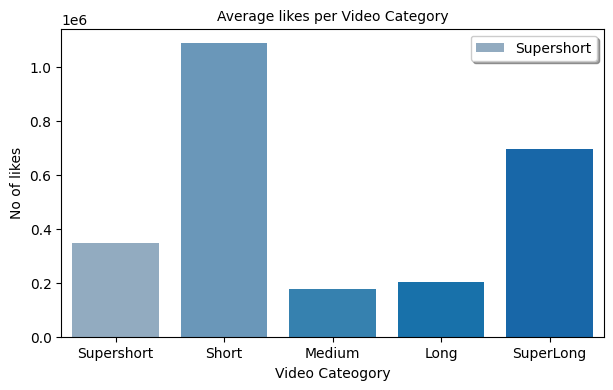

In [76]:
avg_per_video(df)

In [77]:
df.dtypes

video_link                              object
vid_view                                 int64
video_title                             object
channel_url                             object
creator_name                            object
creator_gender                          object
total_channel_subscriber                 int32
total_channel_views                      int64
duration_of_video                       object
duration_in_seconds                      int32
date_of_video_upload            datetime64[ns]
no_of_likes                              Int64
language_of_the_video                   object
subtitle                                object
video_description                       object
hashtags                                 int64
no_of_comments                           int64
date_of_the_last_comment        datetime64[ns]
maximum_quality_of_the_video            object
no_of_videos_the_channel                 int64
no_of_playlist                           Int64
premiered_or_

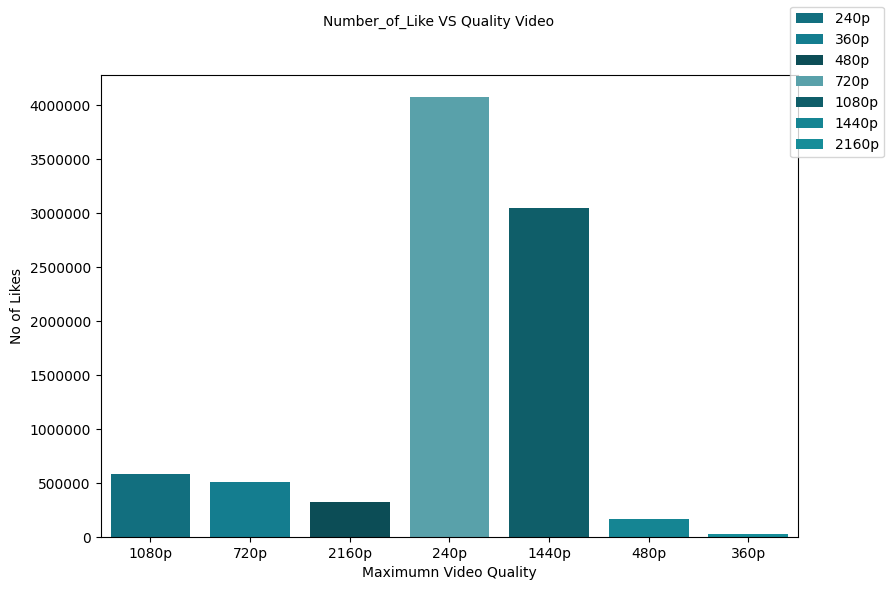

In [78]:
video_quality_Like(df)

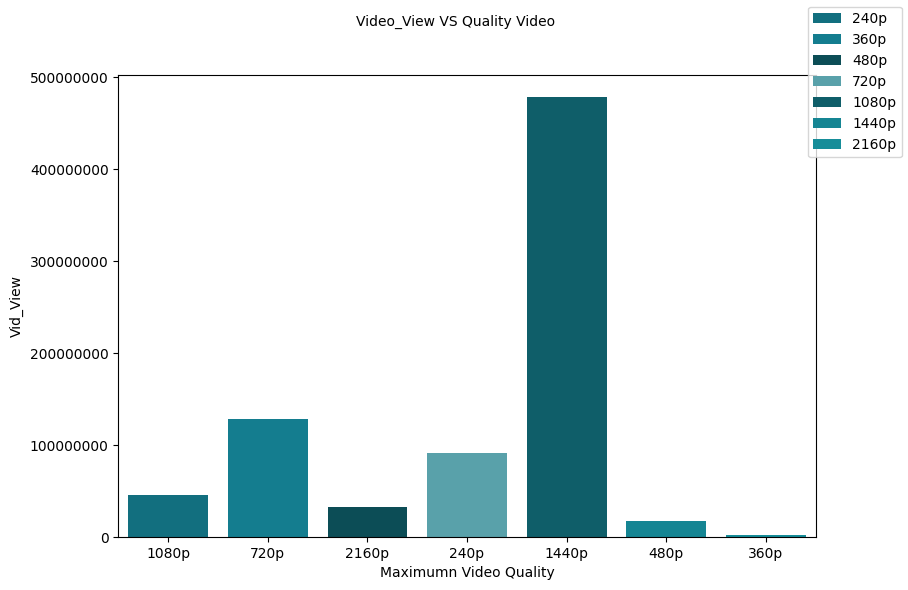

In [79]:
video_quality_view(df)